# Predicting-Survival-of-Patients-with-Heart-Failure Using Machine Learning 

This project is to build a machine learning model capable of predicting whether a patient will 
Survive a Heart Failure.

## Problem Defination 

In a statement; 

Given Clinical Parameters about the patient, we can predict whether or not they survive a Heart Failure 


## Data

Dataset Information Additional Information

A detailed description of the dataset can be found in the Dataset section of the following paper:

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5

## Features

In [142]:
data_dictionary = {"age": "age of patient", 
                  "anaemia": "decrease of red blood cells or hemoglobin", 
                  "creatinine_phosphokinase": "level of the CPK enzyme in the blood", 
                  "diabetes": "if the patient has diabetes", 
                  "ejection_fraction": "percentage of blood leaving the heart at each contraction", 
                  "high_blood_pressure": "if the patient has hypertension", 
                  "platelets": "platelets in the blood", 
                  "serum_creatinine": "level of serum creatinine in the blood", 
                  "serum_sodium": "level of serum sodium in the blood", 
                  "sex": "woman or man", 
                  "smoking": "if the patient smokes or %notebook", 
                  "time": "follow-up period", 
                  "DEATH_EVENT": "if the patient died during the follow-up period"}

## Preparing the tools

In [4]:
# Import all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

# Models for Scikit-learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

# Model for XGB
#from xgboost import xgb, XGBClassifier 

# Model Evaluation 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.metrics import precision_score,recall_score, accuracy_score, f1_score 
from sklearn.metrics import RocCurveDisplay

## Load data

In [5]:
df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data Exploration

In [6]:
df.shape

(299, 13)

In [7]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 fcf8413f3c621e97fdaaa45abb7ae808319c88eff5447328eff14c419c7c6ae0
             Got        36c0d2a4e2d22ad92d713a94dd2286aba0edecb00b7d459f582686d7c52161a1



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 258.0 kB/s eta 0:08:03
   ---------------------------------------- 0.5/124.9 MB 258.0 kB/s eta 0:08:03
   ---------------------------------------- 0.5/124.9 MB 25

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

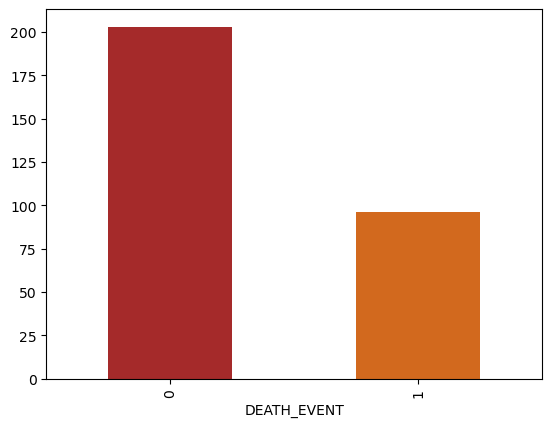

In [47]:
df.DEATH_EVENT.value_counts().plot(kind="bar",
                                   color=["brown", "chocolate"]);

### Frequency Table for Categorical colmns

In [13]:
# List of categorical columns
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

# Create a function to display counts and percentages
def display_categorical_distribution(df, columns):
    for col in columns:
        print(f"Distribution for {col}:")
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        distribution = pd.DataFrame({'Count': counts, 'Percentage': percentages})
        print(distribution)
        print()  # New line for better readability

# Display the distribution for all categorical columns
display_categorical_distribution(df, categorical_columns)

Distribution for anaemia:
         Count  Percentage
anaemia                   
0          170   56.856187
1          129   43.143813

Distribution for diabetes:
          Count  Percentage
diabetes                   
0           174    58.19398
1           125    41.80602

Distribution for high_blood_pressure:
                     Count  Percentage
high_blood_pressure                   
0                      194   64.882943
1                      105   35.117057

Distribution for sex:
     Count  Percentage
sex                   
1      194   64.882943
0      105   35.117057

Distribution for smoking:
         Count  Percentage
smoking                   
0          203   67.892977
1           96   32.107023

Distribution for DEATH_EVENT:
             Count  Percentage
DEATH_EVENT                   
0              203   67.892977
1               96   32.107023



In [14]:
# Compare DEATH_EVENT column with sex column 
pd.crosstab(df.DEATH_EVENT, df.sex)

sex,0,1
DEATH_EVENT,,
0,71,132
1,34,62


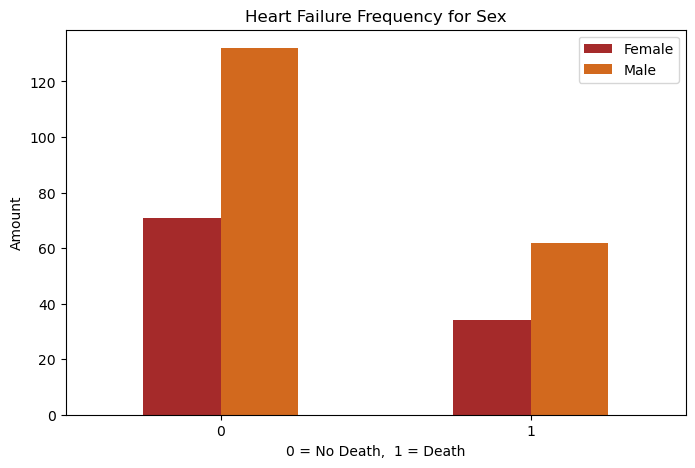

In [48]:
pd.crosstab(df.DEATH_EVENT, df.sex).plot(kind="bar",
                                        figsize=(8, 5),
                                        color =["brown", "chocolate"])
plt.title("Heart Failure Frequency for Sex")
plt.xlabel("0 = No Death,  1 = Death")
plt.ylabel("Amount") 
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [16]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


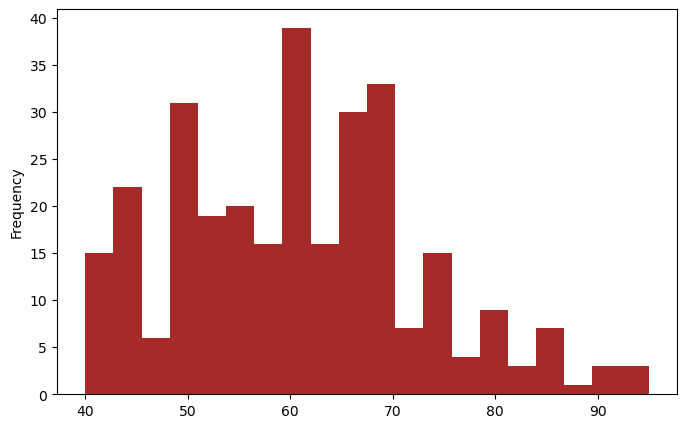

In [49]:
# Age Distribution 
df.age.plot.hist(figsize=(8, 5), 
                color="brown",
                bins=20);

### Ejection Fraction vs Serum Creatinine for Death Event

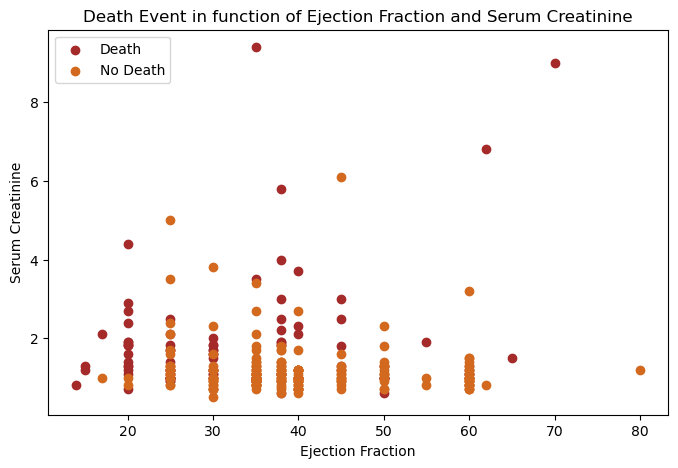

In [50]:
plt.figure(figsize=(8, 5))

# scatter with positive examples
plt.scatter(df.ejection_fraction[df.DEATH_EVENT==1], 
           df.serum_creatinine[df.DEATH_EVENT==1], 
           color = "brown")

# scatter with negative examples
plt.scatter(df.ejection_fraction[df.DEATH_EVENT==0], 
           df.serum_creatinine[df.DEATH_EVENT==0], 
           color = "chocolate");

# Add som usefull info 
plt.title("Death Event in function of Ejection Fraction and Serum Creatinine")
plt.xlabel("Ejection Fraction")
plt.ylabel("Serum Creatinine")
plt.legend(["Death", "No Death"]);

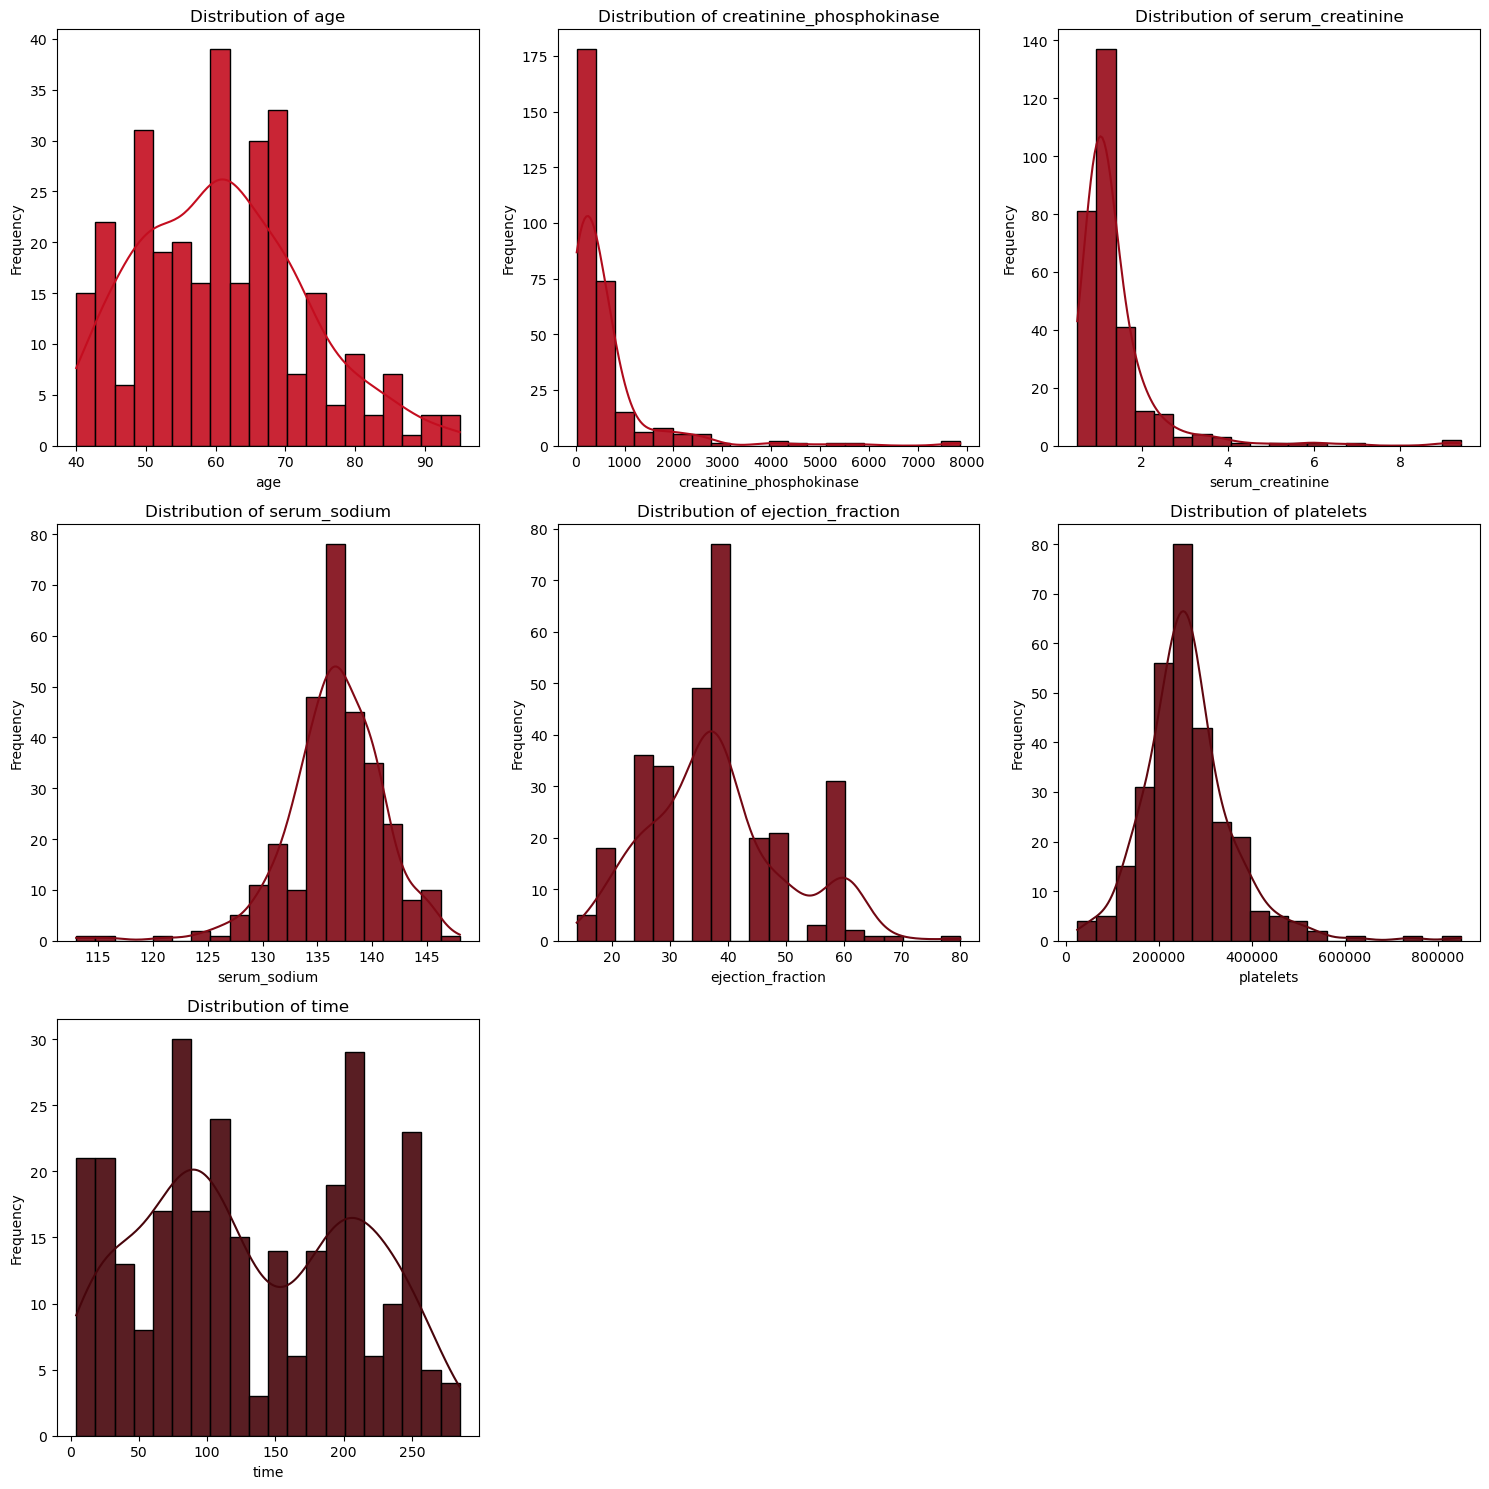

In [26]:
# Define the color palette with progressively darker shades
palette = sns.color_palette([
    "#C40D1F" ,
    "#AF0B1C" ,
    "#970A18" ,
    "#800915" ,
    "#720813" ,
    "#5F070F",
    "#47050B" ,
])
# List of numerical features to plot
numerical_features = [
    'age', 'creatinine_phosphokinase', 'serum_creatinine', 
    'serum_sodium', 'ejection_fraction', 'platelets', 'time'
]
# Number of features
num_features = len(numerical_features)
# Number of columns in the plot grid
num_cols = 3
# Number of rows needed
num_rows = (num_features + num_cols - 1) // num_cols

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), tight_layout=True)
axes = axes.flatten()

# Plot each feature
for i, (feature, color) in enumerate(zip(numerical_features, palette)):
    sns.histplot(df[feature], kde=True, bins=20, color=color, ax=axes[i], alpha=0.9)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [34]:
# Make a Correlation matrix 
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


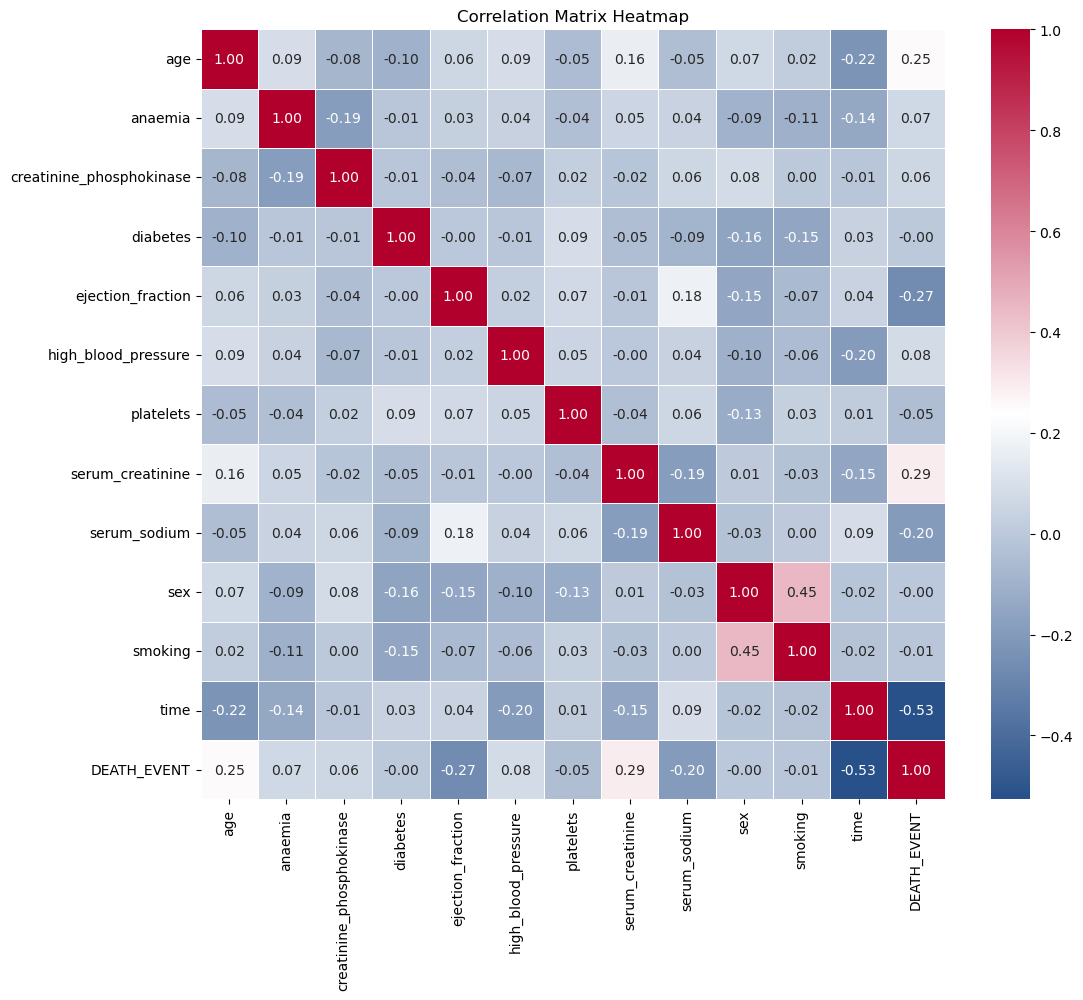

In [37]:
# plot correlation matrix Heatmap
from matplotlib import colors as mcolors
corr_matrix = df.corr()

colors = ['#285089','white' , '#B1002C']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(corr_matrix, 
                annot=True, 
                linewidths=0.5,
                fmt=".2f", 
                cmap=cmap)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Modelling

In [51]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [53]:
# Split data into X and y 
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"] 

# Split into Train and Test set 
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=0.2)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 12), (60, 12), (239,), (60,))

In [81]:
# Put model into dictionary 
np.random.seed(42)
models = {"RandomForest": RandomForestClassifier(),
         "LogisticRegression": LogisticRegression(), 
         "KNN": KNeighborsClassifier()}

# Create a function to fit and score model 
def fit_and_score(models, X_train, y_train, X_test, y_test):
    # Create an empty dictionary
    model_scores = {}

    # create a random seed 
    np.random.seed(42) 

    # fit and evaluate the models 
    for model_name, model in models.items(): 
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Create an accuracy 
        accuracy = model.score(X_test, y_test)
        model_scores[model_name] = accuracy
    
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy:.2f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("\n")

    return model_scores

model_scores = fit_and_score(models = models, 
                            X_train = X_train, 
                            y_train = y_train, 
                            X_test = X_test, 
                            y_test = y_test)

Model: RandomForest
Accuracy: 0.83
Confusion Matrix:
[[41  3]
 [ 7  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        44
           1       0.75      0.56      0.64        16

    accuracy                           0.83        60
   macro avg       0.80      0.75      0.77        60
weighted avg       0.83      0.83      0.83        60



Model: LogisticRegression
Accuracy: 0.78
Confusion Matrix:
[[39  5]
 [ 8  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        44
           1       0.62      0.50      0.55        16

    accuracy                           0.78        60
   macro avg       0.72      0.69      0.70        60
weighted avg       0.77      0.78      0.78        60



Model: KNN
Accuracy: 0.70
Confusion Matrix:
[[38  6]
 [12  4]]
Classification Report:
              precision    recall  f1-score   support

     

C:\Users\Hp\Desktop\my_projects\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Compare models 

In [87]:
# Plotting function for the model comparison
def plot_model_comparison(model_scores):
    model_names = list(model_scores.keys())
    scores = list(model_scores.values())

    plt.figure(figsize=(8, 6))
    plt.bar(model_names, scores, color='brown')
    plt.xlabel("Model")
    plt.ylabel("Accuracy Score")
    plt.title("Model Comparison by Accuracy")
    plt.ylim(0, 1)  
    plt.show()

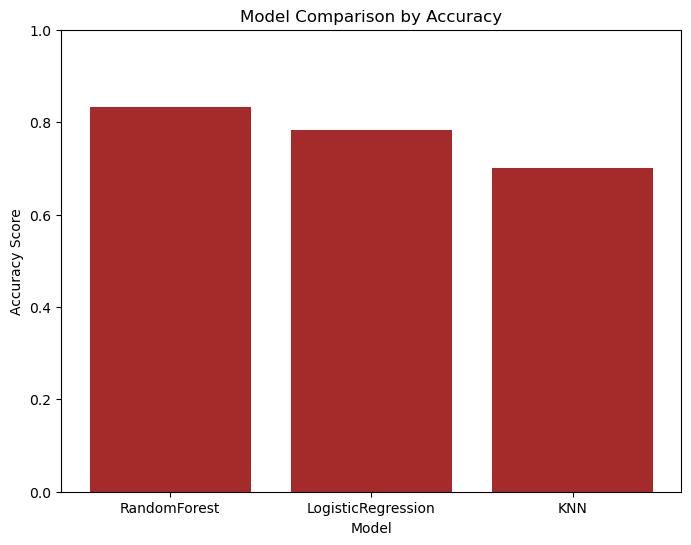

In [88]:
plot_model_comparison(model_scores)

### Hyperparameter Turning Using RandomizedSearchCV

In [96]:
# Create a Hyperparameter grid for RandomForestClassifier since it gave us a better than the rest
param_distributions = {
    'n_estimators': np.arange(10, 200, 10),  # Number of trees
    'max_features': ['sqrt', 'log2'],        # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30, 40, 50], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]}

In [97]:
# Instantiate the RandomForestClassifier
rf_clf = RandomForestClassifier()
rs_rf = RandomizedSearchCV(estimator = rf_clf, 
                              param_distributions = param_distributions, 
                              cv = 5, 
                              n_iter = 20, 
                              verbose = True, 
                              n_jobs=-1)
# Fit the instance of the RandomizedSearchCV
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   verbose=True)

In [98]:
rs_rf.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [99]:
# Score the instance of the RRandomizedSearchCV
rs_rf.score(X_test, y_test)

0.8333333333333334

## Hyperparameter Tuning with GridSearchCV 

In [106]:
param_grid = {
    'n_estimators': np.arange(10, 100, 10),  # Number of trees
    'max_features': ['sqrt'],        # Number of features to consider at each split
    'max_depth': [30], # Maximum depth of the tree
    'min_samples_split': [2,],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [4],           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True]}

# setup grid Hyperparamter grid for RandomForestClassifier 
gs_rf = GridSearchCV(estimator=rf_clf, 
                    param_grid = param_distributions, 
                    cv = 5,  
                    verbose = True, 
                    n_jobs=-1)

# Fit the iisinstance on the GridSearchCV
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4104 candidates, totalling 20520 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             verbose=True)

In [121]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=4,
                       n_estimators=20)

In [122]:
gs_rf.score(X_test, y_test)

0.8333333333333334

### Evaluate our machine larning classifier 

In [123]:
# Make prediction with our tuned model(GrIdSearchCV)
y_preds = gs_rf.predict(X_test)

In [124]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

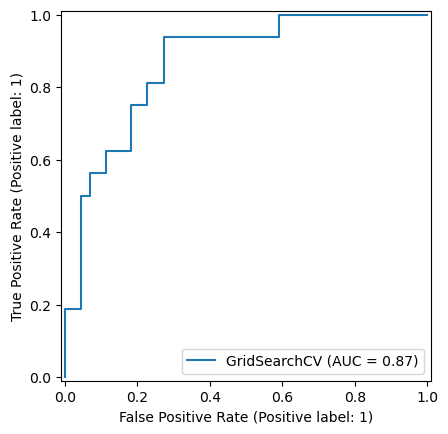

In [111]:
# Plot ROC curve and calculate AUC metric
roc_display = RocCurveDisplay.from_estimator(gs_rf, X_test, y_test)

In [114]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[42  2]
 [ 8  8]]


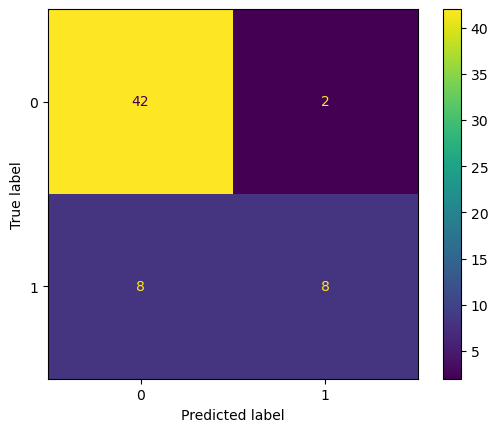

In [116]:
# plot confusion matrix
ConfusionMatrixDisplay.from_estimator(gs_rf, X_test, y_test);

In [118]:
# Print Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.80      0.50      0.62        16

    accuracy                           0.83        60
   macro avg       0.82      0.73      0.75        60
weighted avg       0.83      0.83      0.82        60



### Feature Importance 

In [144]:
# Find feature importance 
best_model = gs_rf.best_estimator_

feature_importance = best_model.feature_importances_

In [127]:
feature_importance

array([0.09224796, 0.00400776, 0.03476402, 0.01176567, 0.16328297,
       0.01192378, 0.05583357, 0.16209837, 0.03983438, 0.0105966 ,
       0.00212548, 0.41151944])

In [128]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

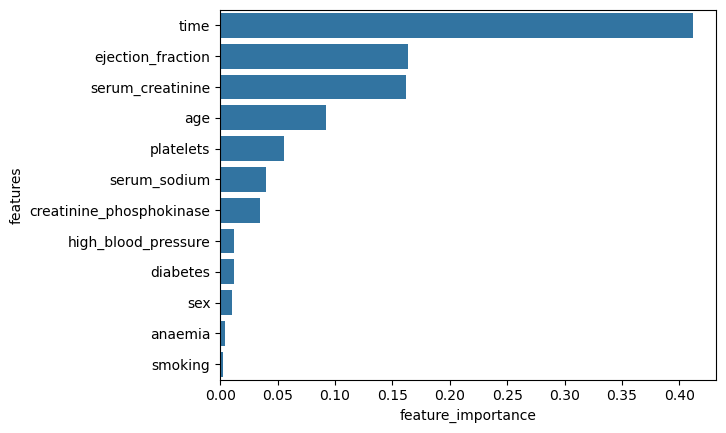

In [129]:
plot_features(X_train.columns, feature_importance)

In [130]:
# Save mmodel
import joblib

In [131]:
joblib.dump(gs_rf, "heart_failure.joblib")

['heart_failure.joblib']

In [133]:
# load the mmodel
loaded_model = joblib.load("heart_failure.joblib")

In [140]:
# Score model 
loaded_model.score(X_test, y_test)

0.8333333333333334

In [141]:
# make prediction
loaded_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [143]:
data_dictionary

{'age': 'age of patient',
 'anaemia': 'decrease of red blood cells or hemoglobin',
 'creatinine_phosphokinase': 'level of the CPK enzyme in the blood',
 'diabetes': 'if the patient has diabetes',
 'ejection_fraction': 'percentage of blood leaving the heart at each contraction',
 'high_blood_pressure': 'if the patient has hypertension',
 'platelets': 'platelets in the blood',
 'serum_creatinine': 'level of serum creatinine in the blood',
 'serum_sodium': 'level of serum sodium in the blood',
 'sex': 'woman or man',
 'smoking': 'if the patient smokes or %notebook',
 'time': 'follow-up period',
 'DEATH_EVENT': 'if the patient died during the follow-up period'}